In [19]:
import cv2
import base64
import random
import requests
import numpy as np
from imutils import paths
from matplotlib import pyplot as plt

url = 'http://0.0.0.0:2103/solve?'

img_bytes = requests.get('https://is.fssp.gov.ru/refresh_visual_captcha/').json()['image']

def readb64(uri):
    encoded_data = uri.split(',')[1]
    nparr = np.fromstring(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

image = readb64(img_bytes)
retval, buffer = cv2.imencode('.jpg', image)
jpg_as_text = base64.b64encode(buffer)

<ipython-input-19-c139ceb3ca7e>:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(base64.b64decode(encoded_data), np.uint8)


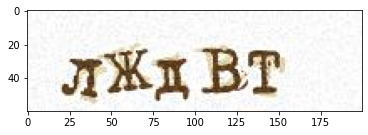

In [23]:
plt.imshow(image)

In [21]:
params = {'image': jpg_as_text}
resp = requests.get(url, params=params)

In [22]:
resp.json()

'лждвт'